In [2]:
# Librerias a utilizar
import pandas as pd

# *EDA*

In [3]:
# importamos el data set "df_streaming" anteriormente tratado en el archivo (ETL.ipynb)
df = pd.read_csv("Datasets/df_streaming.csv")
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,duration_int,duration_type,score
6507,s6508,movie,three stooges: family album,"c3 entertainment, inc.",NaN,NaN,NaN,1998,nr,28 min,"comedy, documentary",the three stooges family album goes behind the...,as6508,28.0,min,3.56
20484,s6294,movie,beyond the clouds,majid majidi,"ishaan khattar, malavika mohanan, goutam ghose...","india, iran",2018-08-10,2018,tv-14,120 min,"dramas, independent movies, international movies",a youthful drug dealer in mumbai must change h...,ns6294,120.0,min,3.50
21369,s7179,movie,kevin hart: laugh at my pain,"leslie small, tim story",kevin hart,united states,2018-10-01,2011,r,89 min,stand-up comedy,"sometimes edgy and always hilarious, comedian ...",ns7179,89.0,min,3.56


In [4]:
# Primero observamos si hay datos duplicados utilizando el "id", ya que al ser un id se espera que sea único
df.duplicated("id").sum()

0

In [5]:
# Observamos si hay valores faltantes, lo cual se puede observar que si hay
df.isna().sum().sort_values(ascending=False)

country          11499
date_added        9554
director          8259
cast              5321
duration           482
duration_int       482
duration_type      482
description          4
show_id              0
type                 0
title                0
release_year         0
rating               0
listed_in            0
id                   0
score                0
dtype: int64

#### Trabajaremos con las colummnas con datos faltantes

In [6]:
# Para el objetivo que buscamos, el cual es crear un sistema de recomendación, hay variables que no consideramos relevantes para el análisi. Las cuales podemos dropear.
df.drop(["country","date_added","show_id","duration"],axis=1, inplace=True)
# "country" : Tiene muchos valores faltantes, y no es relevante en el análisis.
# "date_added" : Tambien posee muchos valores faltantes, y no es relevante.
# "show_id" :  No es necesaria, ya que se encuentra la columna "id"
# "duration" : Ya fue separada en duration_int y duration_type
df.head()

,type,title,director,cast,release_year,rating,listed_in,description,id,duration_int,duration_type,score
0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113.0,min,3.47
1,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,as2,110.0,min,3.55
2,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74.0,min,3.50
3,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",2014,g,documentary,"pink breaks the mold once again, bringing her ...",as4,69.0,min,3.54
4,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45.0,min,3.48


In [7]:
# En los campos "director", "cast" , y "description" imputaremos "Sin dato", debido a que no tenemos forma de conocer estos datos por el momento
df["director"].fillna("Sin dato", inplace=True)
df["cast"].fillna("Sin dato", inplace=True)
df["description"].fillna("Sin dato", inplace=True)

In [8]:
# Trabajaremos con la columna duration_int y duration_type
# primero rellenamos con 0 y cambiamos el tipo de dato
df["duration_int"].fillna(0,inplace=True)
df["duration_int"] = df["duration_int"].astype(int) 

# Ahora podemos imputarle los valores faltantes a través de la media a los campos que sean duration_type "min"
# calculamos la media
media_duration = df["duration_int"].mean()

# y la imputamos donde el duration_type sea min, ya que nos referimos a películas
df.loc[df["duration_type"] == "min", "duration_int"] = df.loc[df["duration_type"] == "min", "duration_int"].fillna(media_duration)

In [9]:
# trabajaremos con duration_type :
# primero observamos que valores hay en type
df["type"].value_counts()

movie      16481
tv show     6517
Name: type, dtype: int64

In [10]:
# Observamos, aqui podemos observar que solo faltan peliculas
df["duration_type"].value_counts()

min       15999
season     6517
Name: duration_type, dtype: int64

In [11]:
# Rellenar los valores faltantes en la columna "duration_type" según el tipo de registro (serie o película)
df["duration_type"].fillna("min", inplace=True)
# Observamos
df["duration_type"].value_counts()

min       16481
season     6517
Name: duration_type, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           22998 non-null  object 
 1   title          22998 non-null  object 
 2   director       22998 non-null  object 
 3   cast           22998 non-null  object 
 4   release_year   22998 non-null  int64  
 5   rating         22998 non-null  object 
 6   listed_in      22998 non-null  object 
 7   description    22998 non-null  object 
 8   id             22998 non-null  object 
 9   duration_int   22998 non-null  int32  
 10  duration_type  22998 non-null  object 
 11  score          22998 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 2.0+ MB


In [13]:
# Colocamos el tipo de dato correcto para cada columna
df["id"] = df["id"].astype("category") 
df["type"] = df["type"].astype("category")
df["title"] = df["title"].astype("category")
df["director"] = df["director"].astype("category")
df["cast"] = df["cast"].astype("category")
df["rating"] = df["rating"].astype("category")
df["listed_in"] = df["listed_in"].astype("category") 
df["description"] = df["description"].astype("category") 
df["duration_type"] = df["duration_int"].astype("category") 
df["release_year"] = df["release_year"].astype(int) 
df["duration_int"] = df["duration_int"].astype(int) 
df["score"] = df["score"].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   type           22998 non-null  category
 1   title          22998 non-null  category
 2   director       22998 non-null  category
 3   cast           22998 non-null  category
 4   release_year   22998 non-null  int32   
 5   rating         22998 non-null  category
 6   listed_in      22998 non-null  category
 7   description    22998 non-null  category
 8   id             22998 non-null  category
 9   duration_int   22998 non-null  int32   
 10  duration_type  22998 non-null  category
 11  score          22998 non-null  float64 
dtypes: category(9), float64(1), int32(2)
memory usage: 3.8 MB


In [15]:
df.describe()

,release_year,duration_int,score
count,22998.000000,22998.000000,22998.000000
mean,2010.811244,65.710584,3.533449
std,15.401142,51.760868,0.048639
min,1920.000000,0.000000,3.340000
25%,2010.000000,3.000000,3.500000
50%,2016.000000,83.000000,3.530000
75%,2019.000000,101.000000,3.570000
max,2021.000000,601.000000,3.720000


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import gc #garbage collector

In [17]:
print(df.shape)
df.head()

(22998, 12)


,type,title,director,cast,release_year,rating,listed_in,description,id,duration_int,duration_type,score
0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,113,113,3.47
1,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,as2,110,110,3.55
2,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,74,74,3.50
3,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",2014,g,documentary,"pink breaks the mold once again, bringing her ...",as4,69,69,3.54
4,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,45,45,3.48


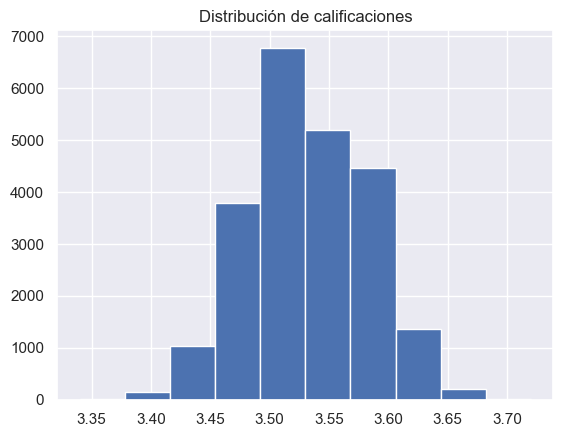

In [18]:
df['score'].hist()
plt.title('Distribución de calificaciones')
plt.show()

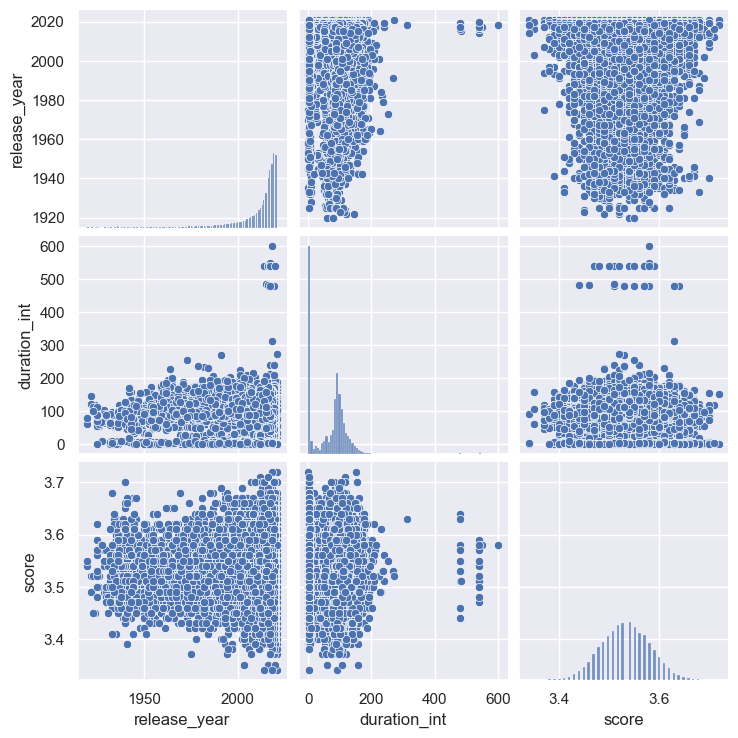

In [19]:
sns.pairplot(data = df)

In [25]:
df.columns

Index(['type', 'title', 'director', 'cast', 'release_year', 'rating',
       'listed_in', 'description', 'id', 'duration_int', 'duration_type',
       'score'],
      dtype='object')

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Cargar los datos
#data = pd.read_csv('.csv')

# Preprocesamiento de datos
# Eliminar filas con valores faltantes
#data = data.dropna()
# Normalizar los datos
#data['score'] = data['score'] / data['score'].max()

# Crear la matriz de características y la variable objetivo
X = df.drop('score', axis=1)
y = df['score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluar el modelo
mse = model.evaluate(X_test, y_test)
print('Error cuadrático medio:', mse)

# Utilizar el modelo para hacer recomendaciones
# Supongamos que queremos recomendar películas similares a la película con id=1
input_data = X.iloc[1].values.reshape(1, -1)



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).